# Cerebellar volumetry and cortical thickness covariance 
## Data: 
    - 1. Freesurfer cortical thickness measures in Detri atlas;
    - 2. Cerebellar lobular volumnes from SUIT/MDTB/MAGeT softwares; 
## Cohorts
- Current cohort: MNI ET/NC (38/32), PPMI/ADNI NC (116/308) QC to be applied.

## Tasks: exploring the structural covariance with cerebellar volumes 
    - 1. ??
    - 2. ??
    
## tbd

In [2]:
## read demographic data and freesurfer outputs
from pathlib import Path
import nipype.interfaces.io as nio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_dir = Path("/codes/tab_data")
data_all_file  = data_dir/'matched_DKT-cere_qced.csv'
data_df    = pd.read_csv(data_all_file , sep=',', header=0, index_col=0);

In [5]:
# prepare ROI list for analysis
# cerebellum ROIs
SUIT_labels = ['Left_I_IV','Right_I_IV','Left_V','Right_V','Left_VI','Vermis_VI','Right_VI','Left_CrusI','Vermis_CrusI','Right_CrusI','Left_CrusII','Vermis_CrusII','Right_CrusII','Left_VIIb','Vermis_VIIb','Right_VIIb','Left_VIIIa','Vermis_VIIIa','Right_VIIIa','Left_VIIIb','Vermis_VIIIb','Right_VIIIb','Left_IX','Vermis_IX','Right_IX','Left_X','Vermis_X','Right_X','Left_Dentate','Right_Dentate','Left_Interposed','Right_Interposed','Left_Fastigial','Right_Fastigial'];
SUIT_labels = [ x.replace('-','_') for x in SUIT_labels]
SUIT_l_labels = ['Left_I_IV',  'Left_V', 'Left_VI', 'Left_CrusI', 'Left_CrusII', 'Left_VIIb', 'Left_VIIIa', 'Left_VIIIb', 'Left_IX', 'Left_X', 'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'];
SUIT_r_labels = ['Right_I_IV','Right_V','Right_VI','Right_CrusI','Right_CrusII','Right_VIIb','Right_VIIIa','Right_VIIIb','Right_IX','Right_X','Right_Dentate','Right_Interposed','Right_Fastigial'];
SUIT_v_labels = ['Vermis_VI', 'Vermis_CrusI', 'Vermis_CrusII', 'Vermis_VIIb', 'Vermis_VIIIa','Vermis_VIIIb', 'Vermis_IX', 'Vermis_X'];
MDTB_labels   = ['MDTB_'+str(x+1) for x in range(10)];

# Freesurfer 'Destrieux' 2009a atlas, and DKT atlas ROIs:
Des_atlas_str="lh_G&S_frontomargin_thickness	lh_G&S_occipital_inf_thickness	lh_G&S_paracentral_thickness	lh_G&S_subcentral_thickness	lh_G&S_transv_frontopol_thickness	lh_G&S_cingul-Ant_thickness	lh_G&S_cingul-Mid-Ant_thickness	lh_G&S_cingul-Mid-Post_thickness	lh_G_cingul-Post-dorsal_thickness	lh_G_cingul-Post-ventral_thickness	lh_G_cuneus_thickness	lh_G_front_inf-Opercular_thickness	lh_G_front_inf-Orbital_thickness	lh_G_front_inf-Triangul_thickness	lh_G_front_middle_thickness	lh_G_front_sup_thickness	lh_G_Ins_lg&S_cent_ins_thickness	lh_G_insular_short_thickness	lh_G_occipital_middle_thickness	lh_G_occipital_sup_thickness	lh_G_oc-temp_lat-fusifor_thickness	lh_G_oc-temp_med-Lingual_thickness	lh_G_oc-temp_med-Parahip_thickness	lh_G_orbital_thickness	lh_G_pariet_inf-Angular_thickness	lh_G_pariet_inf-Supramar_thickness	lh_G_parietal_sup_thickness	lh_G_postcentral_thickness	lh_G_precentral_thickness	lh_G_precuneus_thickness	lh_G_rectus_thickness	lh_G_subcallosal_thickness	lh_G_temp_sup-G_T_transv_thickness	lh_G_temp_sup-Lateral_thickness	lh_G_temp_sup-Plan_polar_thickness	lh_G_temp_sup-Plan_tempo_thickness	lh_G_temporal_inf_thickness	lh_G_temporal_middle_thickness	lh_Lat_Fis-ant-Horizont_thickness	lh_Lat_Fis-ant-Vertical_thickness	lh_Lat_Fis-post_thickness	lh_Pole_occipital_thickness	lh_Pole_temporal_thickness	lh_S_calcarine_thickness	lh_S_central_thickness	lh_S_cingul-Marginalis_thickness	lh_S_circular_insula_ant_thickness	lh_S_circular_insula_inf_thickness	lh_S_circular_insula_sup_thickness	lh_S_collat_transv_ant_thickness	lh_S_collat_transv_post_thickness	lh_S_front_inf_thickness	lh_S_front_middle_thickness	lh_S_front_sup_thickness	lh_S_interm_prim-Jensen_thickness	lh_S_intrapariet&P_trans_thickness	lh_S_oc_middle&Lunatus_thickness	lh_S_oc_sup&transversal_thickness	lh_S_occipital_ant_thickness	lh_S_oc-temp_lat_thickness	lh_S_oc-temp_med&Lingual_thickness	lh_S_orbital_lateral_thickness	lh_S_orbital_med-olfact_thickness	lh_S_orbital-H_Shaped_thickness	lh_S_parieto_occipital_thickness	lh_S_pericallosal_thickness	lh_S_postcentral_thickness	lh_S_precentral-inf-part_thickness	lh_S_precentral-sup-part_thickness	lh_S_suborbital_thickness	lh_S_subparietal_thickness	lh_S_temporal_inf_thickness	lh_S_temporal_sup_thickness	lh_S_temporal_transverse_thickness	lh_MeanThickness_thickness"
DKT_atlas_str="lh_caudalanteriorcingulate_thickness	lh_caudalmiddlefrontal_thickness	lh_cuneus_thickness	lh_entorhinal_thickness	lh_fusiform_thickness	lh_inferiorparietal_thickness	lh_inferiortemporal_thickness	lh_isthmuscingulate_thickness	lh_lateraloccipital_thickness	lh_lateralorbitofrontal_thickness	lh_lingual_thickness	lh_medialorbitofrontal_thickness	lh_middletemporal_thickness	lh_parahippocampal_thickness	lh_paracentral_thickness	lh_parsopercularis_thickness	lh_parsorbitalis_thickness	lh_parstriangularis_thickness	lh_pericalcarine_thickness	lh_postcentral_thickness	lh_posteriorcingulate_thickness	lh_precentral_thickness	lh_precuneus_thickness	lh_rostralanteriorcingulate_thickness	lh_rostralmiddlefrontal_thickness	lh_superiorfrontal_thickness	lh_superiorparietal_thickness	lh_superiortemporal_thickness	lh_supramarginal_thickness	lh_transversetemporal_thickness	lh_insula_thickness	lh_MeanThickness_thickness"
Des_atlas_lh_list=[x.replace('-','_') for x in Des_atlas_str.split('\t')]
Des_atlas_rh_list=['rh_'+x[3:] for x in Des_atlas_lh_list]
DKT_atlas_lh_list=[x.replace('-','_') for x in DKT_atlas_str.split('\t')]
DKT_atlas_rh_list=['rh_'+x[3:] for x in DKT_atlas_lh_list]

# selection and create new cols ('Destrieux' 2009a atlas)
curr_df = data_df.copy()

In [7]:
#Average cortical thickness for left and right hemisphere
lr_mct_vis=curr_df.copy()
l_mct=lr_mct_vis[['group','cohort','left_mean_cortical_thickness']]; l_mct.loc[:,'Hemisphere']='Left'; l_mct.loc[:,'Mean cortical thickness']=l_mct.loc[:,'left_mean_cortical_thickness'];
l_mct=l_mct.drop(columns=['left_mean_cortical_thickness'])
r_mct=lr_mct_vis[['group','cohort','right_mean_cortical_thickness']]; r_mct.loc[:,'Hemisphere']='Right'; r_mct.loc[:,'Mean cortical thickness']=r_mct.loc[:,'right_mean_cortical_thickness'];
r_mct=r_mct.drop(columns=['right_mean_cortical_thickness'])
vis_df=pd.concat([r_mct, l_mct])
vis_df=vis_df.sort_values(by=['Hemisphere'], ascending=1)

vis_mni_df=vis_df.copy()
vis_mni_df=vis_mni_df[vis_mni_df['cohort']=='MNI'];
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

# Draw a nested violinplot and split the violins for easier comparison
fig, ax = plt.subplots(figsize=(14, 10))
sns.violinplot(data=vis_df, x="group", y="Mean cortical thickness", hue="Hemisphere", order=['ET','NC'],split=True, inner="quartile", linewidth=1, palette="muted", ax=ax)
#sns.despine(left=True)
ax.set_title('Mean cortical thickness between ET and NC (Augmented cohort, Destrieux 2009a Atlas)', fontsize=20)

fig1, ax1 = plt.subplots(figsize=(14, 10))
sns.violinplot(data=vis_mni_df, x="group", y="Mean cortical thickness", hue="Hemisphere", order=['ET','NC'],split=True, inner="quartile", linewidth=1, palette="muted", ax=ax1)
#sns.despine(left=True)
ax1.set_title('Mean cortical thickness between ET and NC (MNI cohort, Destrieux 2009a Atlas)', fontsize=20)

#fig.savefig("AugCohort_SUIT-MAGeT_comp.jpg")

KeyError: "['left_mean_cortical_thickness'] not in index"

In [ ]:
#GLM analysis


,Cerebellum_Cortex,Cerebellum_White_Matter,Left_Cerebellum_Cortex,Right_Cerebellum_Cortex,Left_Cerebellum_White_Matter,Right_Cerebellum_White_Matter,Left_I_IV,Left_V,Left_VI,Left_CrusI,...,lh_S_pericallosal_thickness,lh_S_postcentral_thickness,lh_S_precentral_inf_part_thickness,lh_S_precentral_sup_part_thickness,lh_S_suborbital_thickness,lh_S_subparietal_thickness,lh_S_temporal_inf_thickness,lh_S_temporal_sup_thickness,lh_S_temporal_transverse_thickness,lh_MeanThickness_thickness
Cerebellum_Cortex,1.000000,0.551189,0.989190,0.990239,0.552162,0.518103,0.775317,0.743229,0.703777,0.733154,...,-0.171341,-0.048935,-0.005383,-0.008664,0.000597,-0.059206,-0.074053,-0.077250,-0.010201,-0.084206
Cerebellum_White_Matter,0.551189,1.000000,0.575571,0.516971,0.971793,0.970577,0.652950,0.544012,0.595791,0.527255,...,0.011514,0.156688,0.152701,0.124291,-0.124170,0.143245,-0.032984,0.090330,0.147610,0.077124
Left_Cerebellum_Cortex,0.989190,0.575571,1.000000,0.959097,0.587258,0.530127,0.778701,0.760354,0.733070,0.761961,...,-0.177563,-0.049865,-0.005707,-0.004445,-0.025603,-0.046442,-0.076028,-0.080255,-0.012548,-0.094761
Right_Cerebellum_Cortex,0.990239,0.516971,0.959097,1.000000,0.507742,0.496295,0.756567,0.712062,0.661835,0.691085,...,-0.161994,-0.047070,-0.004967,-0.012500,0.025487,-0.070151,-0.070692,-0.072845,-0.007766,-0.072486
Left_Cerebellum_White_Matter,0.552162,0.971793,0.587258,0.507742,1.000000,0.886413,0.641722,0.566727,0.634891,0.557870,...,0.003237,0.145642,0.090347,0.098546,-0.134161,0.144882,-0.015757,0.060715,0.099989,0.041200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lh_S_subparietal_thickness,-0.059206,0.143245,-0.046442,-0.070151,0.144882,0.133234,-0.071218,-0.113433,-0.053245,-0.174481,...,0.345148,0.710898,0.507250,0.662915,0.339177,1.000000,0.525370,0.704157,0.579487,0.730484
lh_S_temporal_inf_thickness,-0.074053,-0.032984,-0.076028,-0.070692,-0.015757,-0.048653,-0.102772,-0.135862,-0.124072,-0.251811,...,0.239819,0.603413,0.601690,0.569913,0.488057,0.525370,1.000000,0.786297,0.587164,0.751823
lh_S_temporal_sup_thickness,-0.077250,0.090330,-0.080255,-0.072845,0.060715,0.115307,-0.080790,-0.168143,-0.159321,-0.308582,...,0.343678,0.812992,0.749350,0.772418,0.484203,0.704157,0.786297,1.000000,0.816808,0.895439
lh_S_temporal_transverse_thickness,-0.010201,0.147610,-0.012548,-0.007766,0.099989,0.187638,-0.019392,-0.066746,-0.076665,-0.187827,...,0.263797,0.672472,0.680830,0.705714,0.353568,0.579487,0.587164,0.816808,1.000000,0.777500


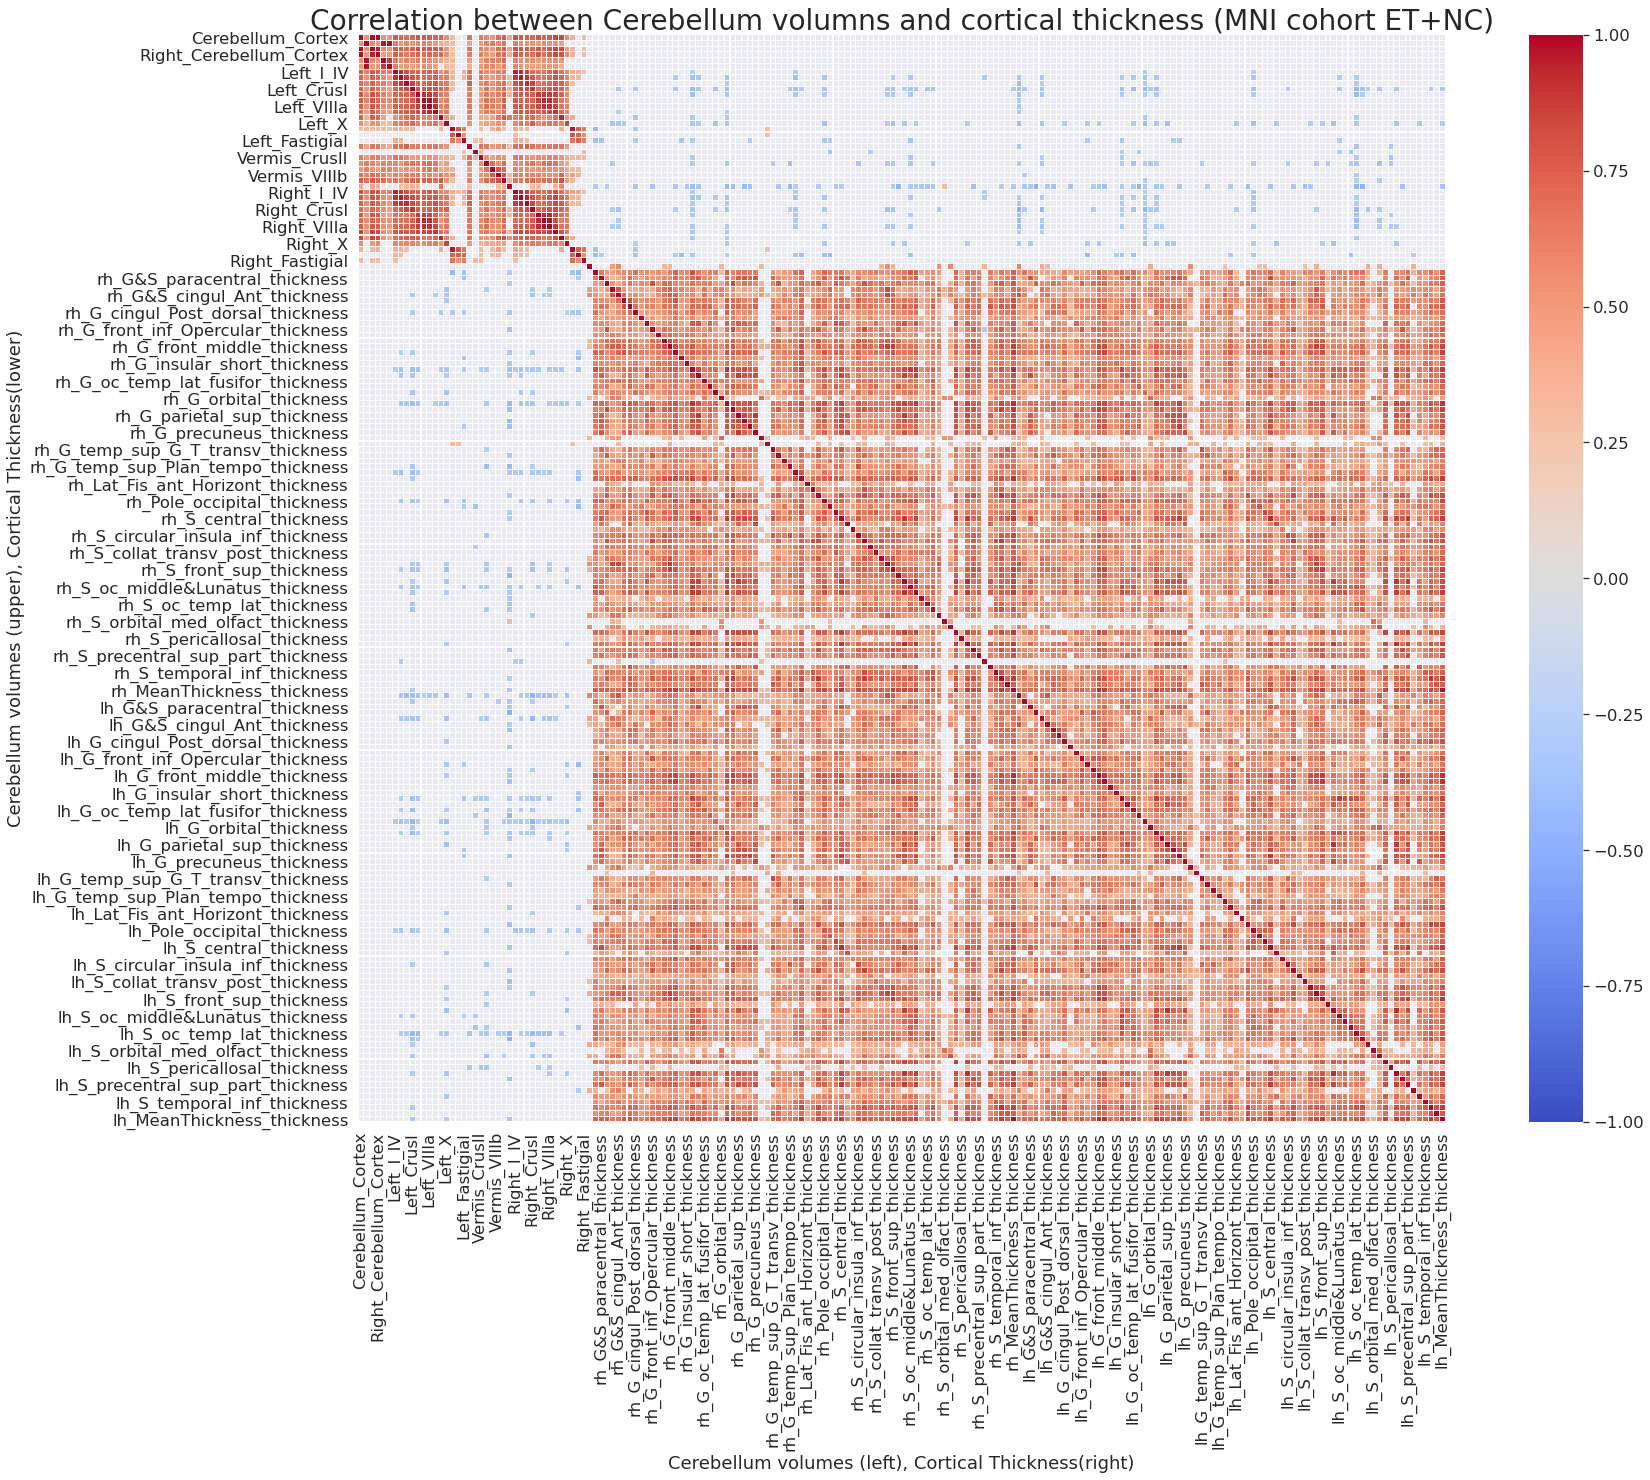

In [53]:
# Heatmap of correlation between cerebellum ROIs and cortical thickness measures, MNI cohort
C_MAP='coolwarm'; TH=0.3
vis_df=curr_df.loc[curr_df['cohort']=='MNI'].copy()
vis_df=vis_df.loc[:,cerebellum_list+SUIT_l_labels+SUIT_v_labels+SUIT_r_labels+Des_atlas_rh_list+Des_atlas_lh_list]

corr_=vis_df.corr()
mask_=corr_.where(np.abs(corr_)>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=False, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("Cerebellum volumes (upper), Cortical Thickness(lower)")
ax.set_xlabel("Cerebellum volumes (left), Cortical Thickness(right)")
ax.set_title('Correlation between Cerebellum volumns and cortical thickness (MNI cohort ET+NC)', fontsize=28)
#line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
#for x in line_pos:
#    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
#f1.savefig("MNI_SUIT-MAGeT_comp.jpg")
display(corr_)

,Cerebellum_Cortex,Cerebellum_White_Matter,Left_Cerebellum_Cortex,Right_Cerebellum_Cortex,Left_Cerebellum_White_Matter,Right_Cerebellum_White_Matter,Left_I_IV,Left_V,Left_VI,Left_CrusI,...,lh_S_pericallosal_thickness,lh_S_postcentral_thickness,lh_S_precentral_inf_part_thickness,lh_S_precentral_sup_part_thickness,lh_S_suborbital_thickness,lh_S_subparietal_thickness,lh_S_temporal_inf_thickness,lh_S_temporal_sup_thickness,lh_S_temporal_transverse_thickness,lh_MeanThickness_thickness
Cerebellum_Cortex,1.000000,0.551189,0.989190,0.990239,0.552162,0.518103,0.775317,0.743229,0.703777,0.733154,...,-0.171341,-0.048935,-0.005383,-0.008664,0.000597,-0.059206,-0.074053,-0.077250,-0.010201,-0.084206
Cerebellum_White_Matter,0.551189,1.000000,0.575571,0.516971,0.971793,0.970577,0.652950,0.544012,0.595791,0.527255,...,0.011514,0.156688,0.152701,0.124291,-0.124170,0.143245,-0.032984,0.090330,0.147610,0.077124
Left_Cerebellum_Cortex,0.989190,0.575571,1.000000,0.959097,0.587258,0.530127,0.778701,0.760354,0.733070,0.761961,...,-0.177563,-0.049865,-0.005707,-0.004445,-0.025603,-0.046442,-0.076028,-0.080255,-0.012548,-0.094761
Right_Cerebellum_Cortex,0.990239,0.516971,0.959097,1.000000,0.507742,0.496295,0.756567,0.712062,0.661835,0.691085,...,-0.161994,-0.047070,-0.004967,-0.012500,0.025487,-0.070151,-0.070692,-0.072845,-0.007766,-0.072486
Left_Cerebellum_White_Matter,0.552162,0.971793,0.587258,0.507742,1.000000,0.886413,0.641722,0.566727,0.634891,0.557870,...,0.003237,0.145642,0.090347,0.098546,-0.134161,0.144882,-0.015757,0.060715,0.099989,0.041200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lh_S_subparietal_thickness,-0.059206,0.143245,-0.046442,-0.070151,0.144882,0.133234,-0.071218,-0.113433,-0.053245,-0.174481,...,0.345148,0.710898,0.507250,0.662915,0.339177,1.000000,0.525370,0.704157,0.579487,0.730484
lh_S_temporal_inf_thickness,-0.074053,-0.032984,-0.076028,-0.070692,-0.015757,-0.048653,-0.102772,-0.135862,-0.124072,-0.251811,...,0.239819,0.603413,0.601690,0.569913,0.488057,0.525370,1.000000,0.786297,0.587164,0.751823
lh_S_temporal_sup_thickness,-0.077250,0.090330,-0.080255,-0.072845,0.060715,0.115307,-0.080790,-0.168143,-0.159321,-0.308582,...,0.343678,0.812992,0.749350,0.772418,0.484203,0.704157,0.786297,1.000000,0.816808,0.895439
lh_S_temporal_transverse_thickness,-0.010201,0.147610,-0.012548,-0.007766,0.099989,0.187638,-0.019392,-0.066746,-0.076665,-0.187827,...,0.263797,0.672472,0.680830,0.705714,0.353568,0.579487,0.587164,0.816808,1.000000,0.777500


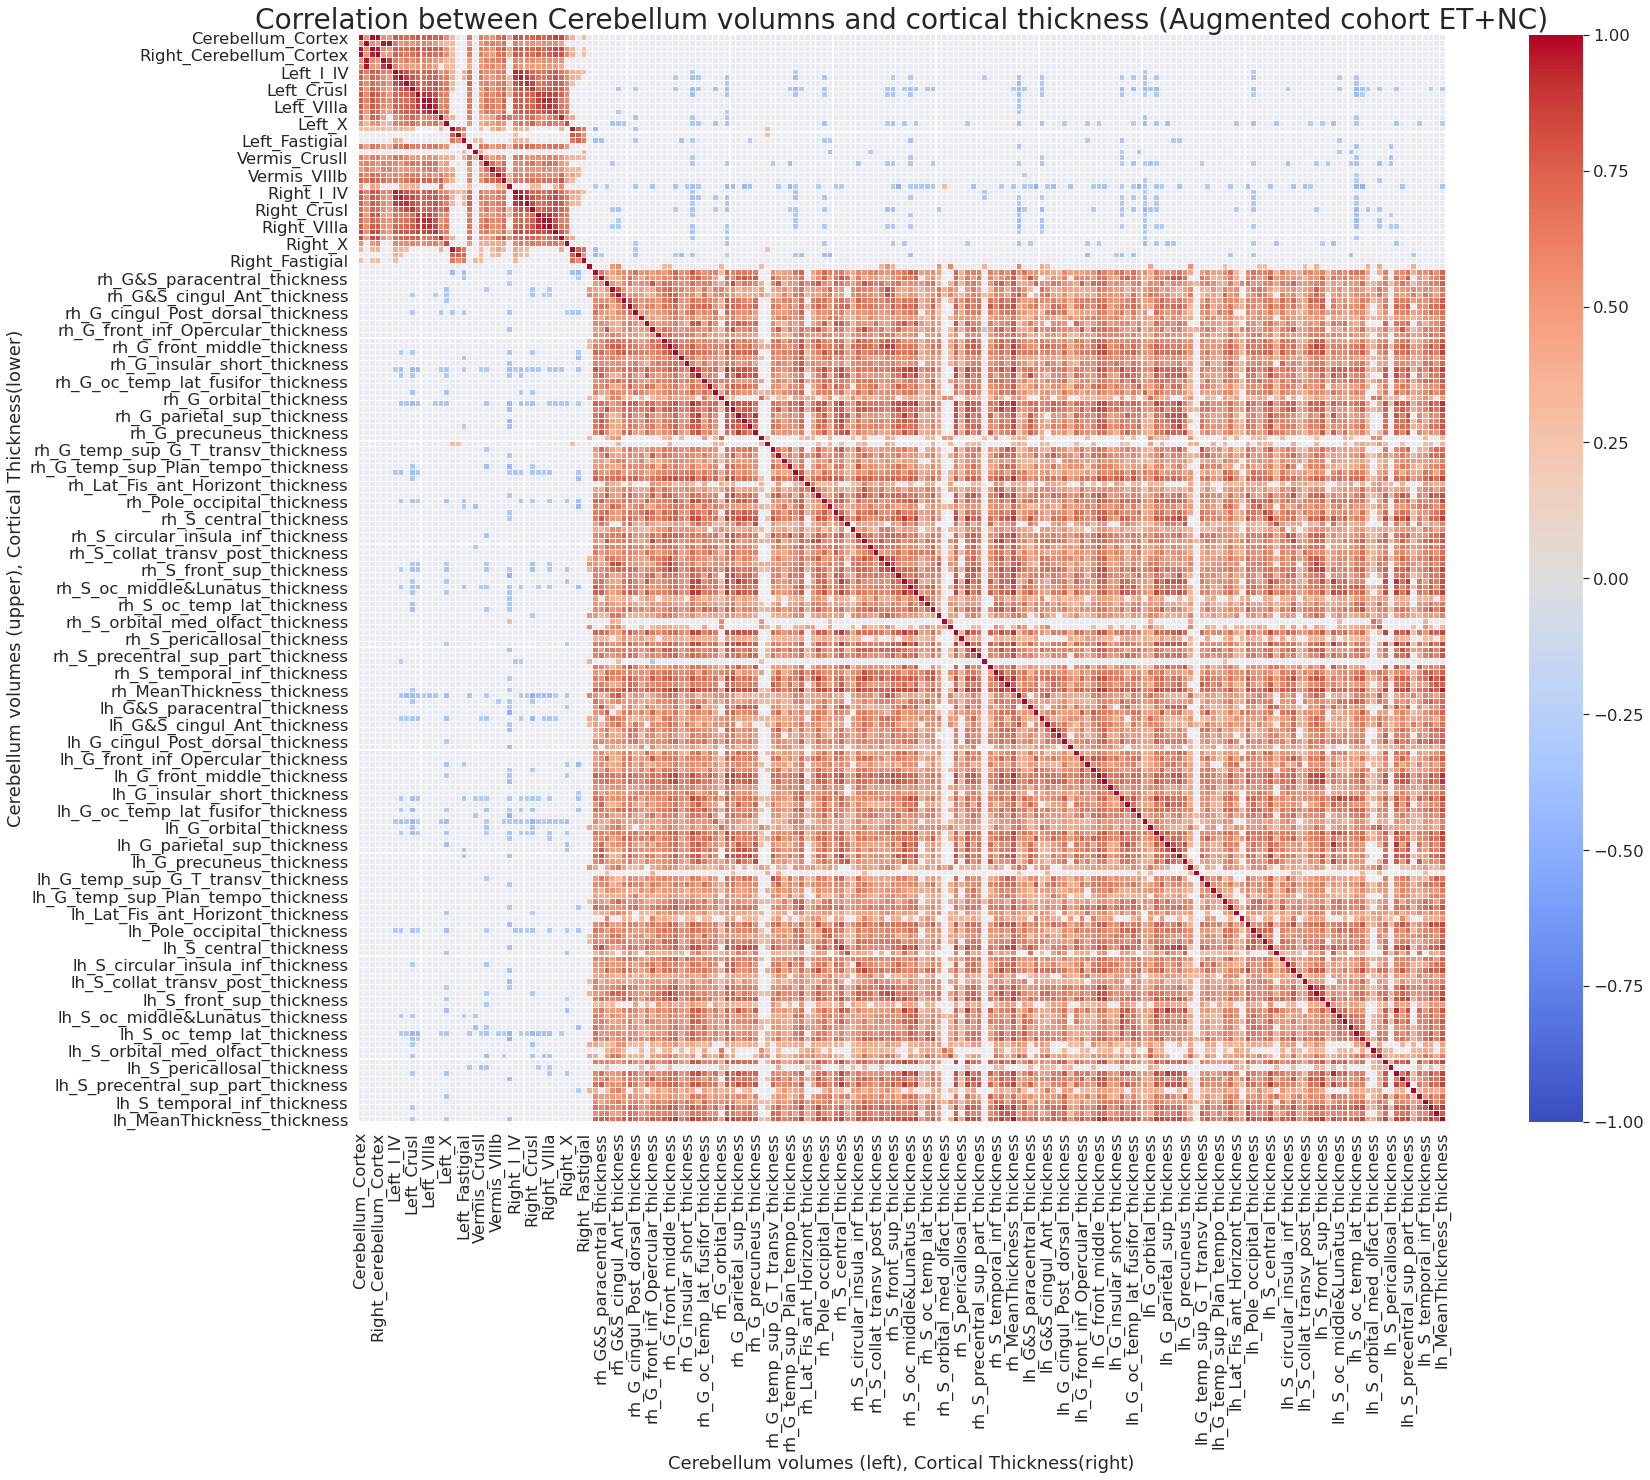

In [54]:
# Heatmap of correlation between cerebellum ROIs and cortical thickness measures: augmented cohort
C_MAP='coolwarm'; TH=0.3
#vis_df=curr_df.loc[curr_df['cohort']=='MNI'].copy()
vis_df=vis_df.loc[:,cerebellum_list+SUIT_l_labels+SUIT_v_labels+SUIT_r_labels+Des_atlas_rh_list+Des_atlas_lh_list]

corr_=vis_df.corr()
mask_=corr_.where(np.abs(corr_)>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=False, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("Cerebellum volumes (upper), Cortical Thickness(lower)")
ax.set_xlabel("Cerebellum volumes (left), Cortical Thickness(right)")
ax.set_title('Correlation between Cerebellum volumns and cortical thickness (Augmented cohort ET+NC)', fontsize=28)
#line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
#for x in line_pos:
#    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
#f1.savefig("MNI_SUIT-MAGeT_comp.jpg")
display(corr_)

,Cerebellum_Cortex,Cerebellum_White_Matter,Left_Cerebellum_Cortex,Right_Cerebellum_Cortex,Left_Cerebellum_White_Matter,Right_Cerebellum_White_Matter,Left_I_IV,Left_V,Left_VI,Left_CrusI,...,lh_S_pericallosal_thickness,lh_S_postcentral_thickness,lh_S_precentral_inf_part_thickness,lh_S_precentral_sup_part_thickness,lh_S_suborbital_thickness,lh_S_subparietal_thickness,lh_S_temporal_inf_thickness,lh_S_temporal_sup_thickness,lh_S_temporal_transverse_thickness,lh_MeanThickness_thickness
Cerebellum_Cortex,1.000000,0.688034,0.987076,0.986895,0.687422,0.632399,0.830261,0.819017,0.726465,0.738811,...,-0.105585,-0.203082,-0.004020,-0.078724,-0.295926,-0.334779,-0.211457,-0.158996,0.039290,-0.242942
Cerebellum_White_Matter,0.688034,1.000000,0.699422,0.658598,0.964724,0.957020,0.694789,0.543656,0.648071,0.605916,...,-0.215499,0.000829,0.077382,0.009290,-0.237636,-0.029122,-0.099861,0.024849,0.109575,-0.078238
Left_Cerebellum_Cortex,0.987076,0.699422,1.000000,0.948283,0.720028,0.619480,0.802831,0.810432,0.760334,0.763860,...,-0.078063,-0.190015,-0.013229,-0.064299,-0.287310,-0.269660,-0.201247,-0.155273,0.029551,-0.237437
Right_Cerebellum_Cortex,0.986895,0.658598,0.948283,1.000000,0.636637,0.628890,0.836195,0.806270,0.673388,0.694292,...,-0.130539,-0.210935,0.005357,-0.091193,-0.296873,-0.391604,-0.216215,-0.158591,0.048070,-0.242140
Left_Cerebellum_White_Matter,0.687422,0.964724,0.720028,0.636637,1.000000,0.846908,0.650264,0.540499,0.684919,0.609053,...,-0.192067,0.076632,0.044040,0.062973,-0.224620,0.025993,-0.054464,0.050095,0.135990,-0.044781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lh_S_subparietal_thickness,-0.334779,-0.029122,-0.269660,-0.391604,0.025993,-0.087455,-0.305603,-0.354024,-0.248582,-0.274845,...,0.287613,0.618216,0.343703,0.530434,0.334118,1.000000,0.458566,0.656920,0.528839,0.672324
lh_S_temporal_inf_thickness,-0.211457,-0.099861,-0.201247,-0.216215,-0.054464,-0.141699,-0.256447,-0.283065,-0.321599,-0.477820,...,0.092147,0.662945,0.528764,0.527703,0.582577,0.458566,1.000000,0.864313,0.659416,0.795601
lh_S_temporal_sup_thickness,-0.158996,0.024849,-0.155273,-0.158591,0.050095,-0.004996,-0.176987,-0.236115,-0.264591,-0.386881,...,0.160032,0.760084,0.590627,0.682873,0.561948,0.656920,0.864313,1.000000,0.864982,0.874572
lh_S_temporal_transverse_thickness,0.039290,0.109575,0.029551,0.048070,0.135990,0.071507,0.002149,-0.020008,-0.139438,-0.218005,...,0.167052,0.616139,0.586387,0.642203,0.477052,0.528839,0.659416,0.864982,1.000000,0.730695


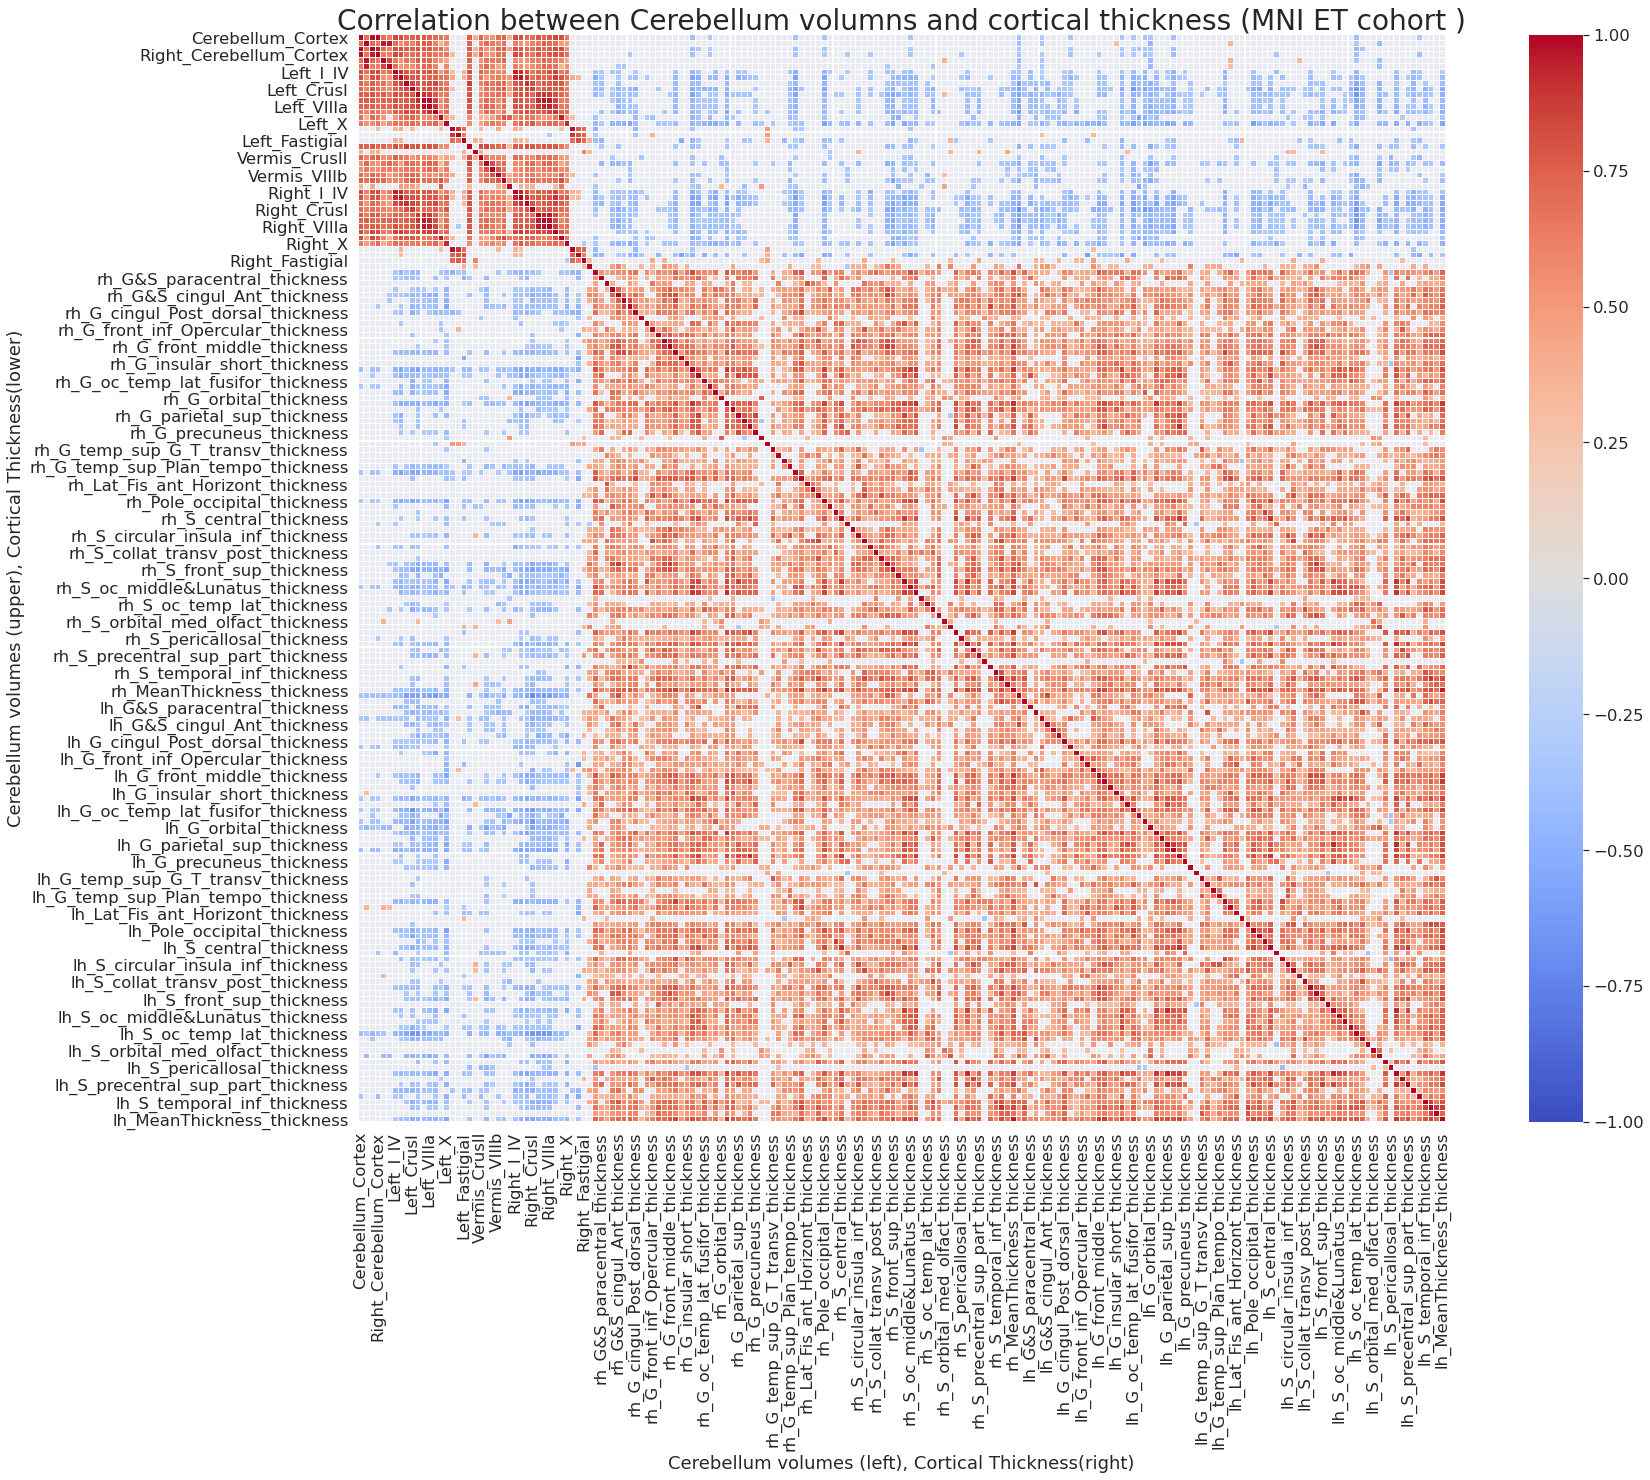

In [55]:
# Heatmap of correlation between cerebellum ROIs and cortical thickness measures
C_MAP='coolwarm'; TH=0.3
vis_df=curr_df.loc[(curr_df['cohort']=='MNI')&(curr_df['group']=='ET')].copy()
vis_df=vis_df.loc[:,cerebellum_list+SUIT_l_labels+SUIT_v_labels+SUIT_r_labels+Des_atlas_rh_list+Des_atlas_lh_list]

corr_=vis_df.corr()
mask_=corr_.where(np.abs(corr_)>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=False, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("Cerebellum volumes (upper), Cortical Thickness(lower)")
ax.set_xlabel("Cerebellum volumes (left), Cortical Thickness(right)")
ax.set_title('Correlation between Cerebellum volumns and cortical thickness (MNI ET cohort )', fontsize=28)
#line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
#for x in line_pos:
#    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
#f1.savefig("MNI_SUIT-MAGeT_comp.jpg")
display(corr_)

,Cerebellum_Cortex,Cerebellum_White_Matter,Left_Cerebellum_Cortex,Right_Cerebellum_Cortex,Left_Cerebellum_White_Matter,Right_Cerebellum_White_Matter,Left_I_IV,Left_V,Left_VI,Left_CrusI,...,lh_S_pericallosal_thickness,lh_S_postcentral_thickness,lh_S_precentral_inf_part_thickness,lh_S_precentral_sup_part_thickness,lh_S_suborbital_thickness,lh_S_subparietal_thickness,lh_S_temporal_inf_thickness,lh_S_temporal_sup_thickness,lh_S_temporal_transverse_thickness,lh_MeanThickness_thickness
Cerebellum_Cortex,1.000000,0.455951,0.991464,0.992788,0.455156,0.447087,0.745008,0.715170,0.706121,0.775838,...,-0.267534,0.116170,-0.049252,0.025475,0.285936,0.218546,0.013212,-0.070274,-0.115209,-0.034689
Cerebellum_White_Matter,0.455951,1.000000,0.486573,0.420926,0.989092,0.989538,0.632443,0.584092,0.572435,0.511154,...,0.210285,0.443077,0.196946,0.239436,-0.030285,0.342732,-0.032444,0.098039,0.142458,0.178850
Left_Cerebellum_Cortex,0.991464,0.486573,1.000000,0.968681,0.483306,0.479485,0.764481,0.740664,0.723731,0.796762,...,-0.294811,0.153250,-0.002483,0.076009,0.245400,0.216331,0.022280,-0.035913,-0.074164,-0.014013
Right_Cerebellum_Cortex,0.992788,0.420926,0.968681,1.000000,0.422418,0.410563,0.715882,0.680958,0.679293,0.744914,...,-0.238424,0.080326,-0.091513,-0.021375,0.318901,0.217291,0.004675,-0.100810,-0.151213,-0.053178
Left_Cerebellum_White_Matter,0.455156,0.989092,0.483306,0.422418,1.000000,0.957491,0.638245,0.603926,0.588288,0.524437,...,0.245870,0.463012,0.226450,0.284049,-0.017621,0.401926,0.030609,0.141146,0.123367,0.244185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lh_S_subparietal_thickness,0.218546,0.342732,0.216331,0.217291,0.401926,0.277507,0.291996,0.385798,0.354873,0.177175,...,0.189246,0.648373,0.306456,0.581211,0.214738,1.000000,0.437055,0.472590,0.207484,0.583148
lh_S_temporal_inf_thickness,0.013212,-0.032444,0.022280,0.004675,0.030609,-0.093515,0.067185,0.099940,0.139689,0.099813,...,0.240599,0.316079,0.541147,0.458321,0.297576,0.437055,1.000000,0.652203,0.286697,0.739700
lh_S_temporal_sup_thickness,-0.070274,0.098039,-0.035913,-0.100810,0.141146,0.053746,0.110009,0.107501,0.097584,-0.010164,...,0.378166,0.588589,0.704518,0.503628,0.285775,0.472590,0.652203,1.000000,0.347373,0.752621
lh_S_temporal_transverse_thickness,-0.115209,0.142458,-0.074164,-0.151213,0.123367,0.158145,0.029700,0.090506,0.141951,0.098790,...,0.041084,0.182352,0.349460,0.217594,-0.008275,0.207484,0.286697,0.347373,1.000000,0.404917


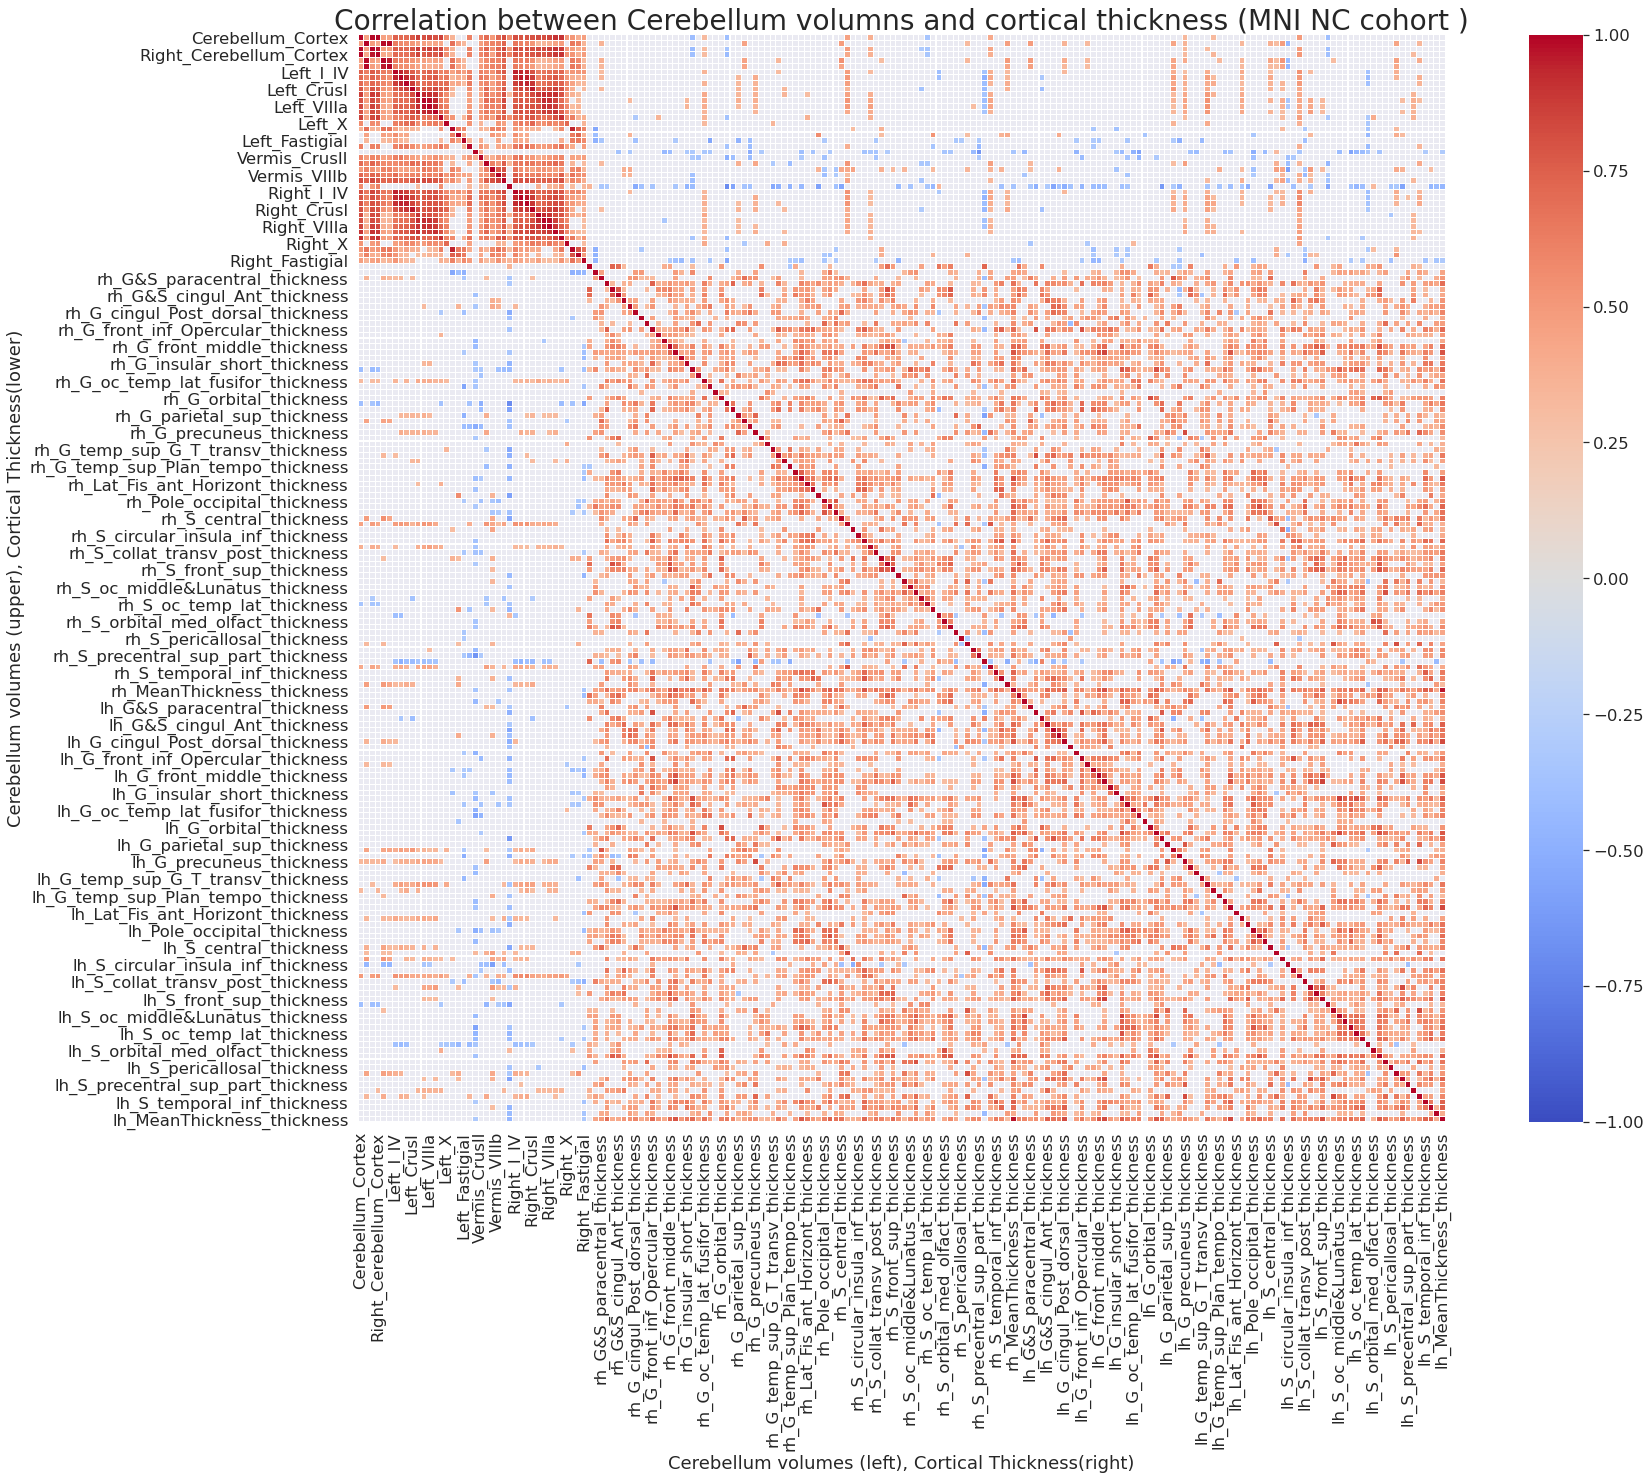

In [56]:
# Heatmap of correlation between cerebellum ROIs and cortical thickness measures
C_MAP='coolwarm'; TH=0.3
vis_df=curr_df.loc[(curr_df['cohort']=='MNI')&(curr_df['group']=='NC')].copy()
vis_df=vis_df.loc[:,cerebellum_list+SUIT_l_labels+SUIT_v_labels+SUIT_r_labels+Des_atlas_rh_list+Des_atlas_lh_list]

corr_=vis_df.corr()
mask_=corr_.where(np.abs(corr_)>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=False, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("Cerebellum volumes (upper), Cortical Thickness(lower)")
ax.set_xlabel("Cerebellum volumes (left), Cortical Thickness(right)")
ax.set_title('Correlation between Cerebellum volumns and cortical thickness (MNI NC cohort )', fontsize=28)
#line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
#for x in line_pos:
#    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
#f1.savefig("MNI_SUIT-MAGeT_comp.jpg")
display(corr_)

,Cerebellum_Cortex,Cerebellum_White_Matter,Left_Cerebellum_Cortex,Right_Cerebellum_Cortex,Left_Cerebellum_White_Matter,Right_Cerebellum_White_Matter,Left_I_IV,Left_V,Left_VI,Left_CrusI,...,lh_S_pericallosal_thickness,lh_S_postcentral_thickness,lh_S_precentral_inf_part_thickness,lh_S_precentral_sup_part_thickness,lh_S_suborbital_thickness,lh_S_subparietal_thickness,lh_S_temporal_inf_thickness,lh_S_temporal_sup_thickness,lh_S_temporal_transverse_thickness,lh_MeanThickness_thickness
Cerebellum_Cortex,1.000000,0.548865,0.990242,0.990582,0.549742,0.529590,0.601167,0.589848,0.577972,0.589600,...,-0.086124,0.073047,0.137514,0.053220,-0.043294,0.092203,0.052575,0.197939,-0.023214,0.124975
Cerebellum_White_Matter,0.548865,1.000000,0.538384,0.548732,0.984203,0.982948,0.504981,0.495276,0.474849,0.448598,...,0.014959,0.136401,0.207931,0.117076,0.004255,0.308289,0.280207,0.342508,0.110450,0.268130
Left_Cerebellum_Cortex,0.990242,0.538384,1.000000,0.961835,0.538008,0.520760,0.591529,0.577266,0.569490,0.585987,...,-0.090080,0.073346,0.129561,0.050002,-0.046791,0.082980,0.056666,0.198102,-0.028351,0.123110
Right_Cerebellum_Cortex,0.990582,0.548732,0.961835,1.000000,0.550822,0.528201,0.599211,0.591000,0.575322,0.581944,...,-0.080601,0.071365,0.142714,0.055371,-0.039036,0.099512,0.047557,0.194017,-0.017726,0.124433
Left_Cerebellum_White_Matter,0.549742,0.984203,0.538008,0.550822,1.000000,0.934866,0.521588,0.514160,0.493105,0.467954,...,0.015893,0.153362,0.204019,0.122214,-0.002140,0.308150,0.286559,0.351027,0.115547,0.273544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lh_S_subparietal_thickness,0.092203,0.308289,0.082980,0.099512,0.308150,0.298119,0.175876,0.184545,0.177978,0.167058,...,0.031688,0.563443,0.486377,0.507911,0.240530,1.000000,0.401263,0.598436,0.482848,0.642583
lh_S_temporal_inf_thickness,0.052575,0.280207,0.056666,0.047557,0.286559,0.264234,0.093580,0.095928,0.090595,0.110067,...,0.174360,0.456148,0.484162,0.395567,0.214604,0.401263,1.000000,0.656382,0.336588,0.647798
lh_S_temporal_sup_thickness,0.197939,0.342508,0.198102,0.194017,0.351027,0.322200,0.265632,0.282441,0.273957,0.281268,...,0.150592,0.677861,0.677270,0.597625,0.266510,0.598436,0.656382,1.000000,0.515793,0.857158
lh_S_temporal_transverse_thickness,-0.023214,0.110450,-0.028351,-0.017726,0.115547,0.101460,0.096763,0.101797,0.114476,0.108389,...,0.263358,0.508892,0.501538,0.446943,0.240503,0.482848,0.336588,0.515793,1.000000,0.613067


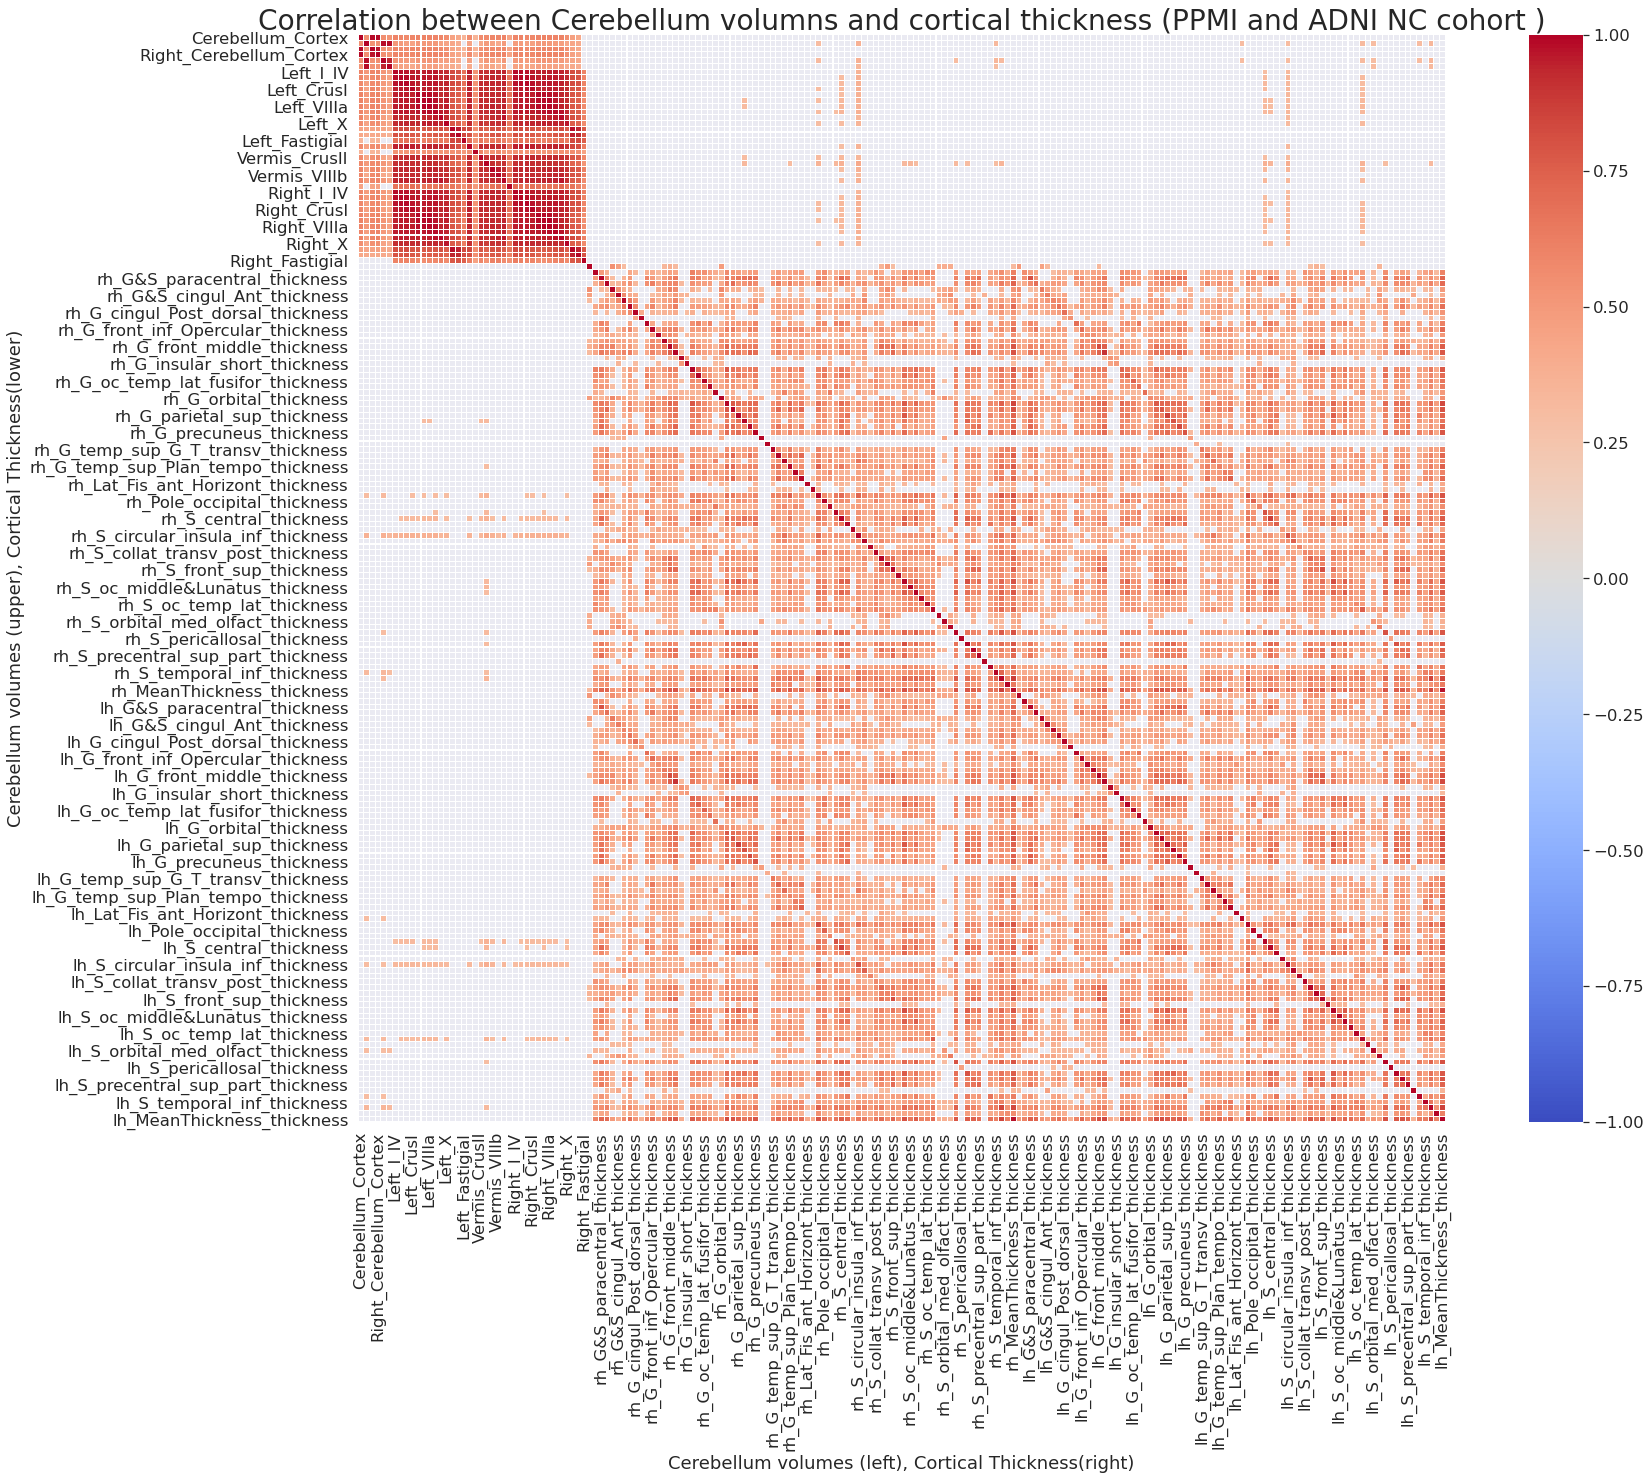

In [57]:
# Heatmap of correlation between cerebellum ROIs and cortical thickness measures
C_MAP='coolwarm'; TH=0.3
vis_df=curr_df.loc[(curr_df['cohort']=='ADNI')|(curr_df['cohort']=='PPMI')].copy()
vis_df=vis_df.loc[:,cerebellum_list+SUIT_l_labels+SUIT_v_labels+SUIT_r_labels+Des_atlas_rh_list+Des_atlas_lh_list]

corr_=vis_df.corr()
mask_=corr_.where(np.abs(corr_)>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=False, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("Cerebellum volumes (upper), Cortical Thickness(lower)")
ax.set_xlabel("Cerebellum volumes (left), Cortical Thickness(right)")
ax.set_title('Correlation between Cerebellum volumns and cortical thickness (PPMI and ADNI NC cohort )', fontsize=28)
#line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
#for x in line_pos:
#    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
#f1.savefig("MNI_SUIT-MAGeT_comp.jpg")
display(corr_)

In [ ]:
# Heatmap of correlation between cerebellum ROIs and cortical thickness measures
C_MAP='coolwarm'; TH=0.3
vis_df=curr_df.loc[(curr_df['cohort']=='ADNI')|(curr_df['cohort']=='PPMI')].copy()
vis_df=vis_df.loc[:,cerebellum_list+SUIT_l_labels+SUIT_v_labels+SUIT_r_labels+Des_atlas_rh_list+Des_atlas_lh_list]

corr_=vis_df.corr()
mask_=corr_.where(np.abs(corr_)>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=False, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("Cerebellum volumes (upper), Cortical Thickness(lower)")
ax.set_xlabel("Cerebellum volumes (left), Cortical Thickness(right)")
ax.set_title('Correlation between Cerebellum volumns and cortical thickness (PPMI and ADNI NC cohort )', fontsize=28)
#line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
#for x in line_pos:
#    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
#f1.savefig("MNI_SUIT-MAGeT_comp.jpg")
display(corr_)